In [58]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Formatting dataset

In [59]:
file_path = os.path.join(os.getcwd(), 'Outcomes.xlsx')

outcomes = pd.read_excel(file_path)
cols = list(outcomes.columns)

outcomes=outcomes[cols[:cols.index('Unnamed: 7')]]
# outcomes=outcomes.fillna(0)
outcomes.rename(columns={'Area_Outcome': 'Date'}, inplace=True)

## Surface level analysis - only current SIBs

In [74]:
def format_raw_data(cs_outcomes):
    current_SIBs = [ 'H&B', 'Camden', 'Enfield', 'WLA', 'Shropshire', 'TH LD', 'TH SMI']
    cs_outcomes = outcomes[outcomes['SIB'].isin(current_SIBs)].reset_index(drop=True)
    cs_outcomes['Month'] = cs_outcomes['Date'].dt.month
    cs_outcomes['Quarter'] = np.where(cs_outcomes['Date'].dt.month == 4, 'Q1',
                                        np.where(cs_outcomes['Date'].dt.month == 7, 'Q2',
                                                np.where(cs_outcomes['Date'].dt.month == 10, 'Q3','Q4')
                                                )
                                        )

    cs_outcomes['FY'] = np.where(cs_outcomes['Quarter'].isin(['Q1', 'Q2', 'Q3']), cs_outcomes['Date'].dt.year,cs_outcomes['Date'].dt.year -1)
    cs_outcomes['FY'] = cs_outcomes['FY'].astype(str)
    cs_outcomes['FY Date'] = cs_outcomes['FY'] + cs_outcomes['Quarter']
    return cs_outcomes

cs_outcomes = format_raw_data(outcomes)
cs_outcomes.head()

,Date,SIB,Referrals,Engagements,Job Starts,Sustainments,Number of ES,Month,Quarter,FY,FY Date
0,2016-01-01,H&B,NaN,NaN,NaN,NaN,NaN,1,Q4,2015,2015Q4
1,2016-04-01,H&B,NaN,NaN,NaN,NaN,NaN,4,Q1,2016,2016Q1
2,2016-07-01,H&B,NaN,NaN,NaN,NaN,NaN,7,Q2,2016,2016Q2
3,2016-10-01,H&B,NaN,NaN,NaN,NaN,NaN,10,Q3,2016,2016Q3
4,2017-01-01,H&B,NaN,NaN,NaN,NaN,NaN,1,Q4,2016,2016Q4


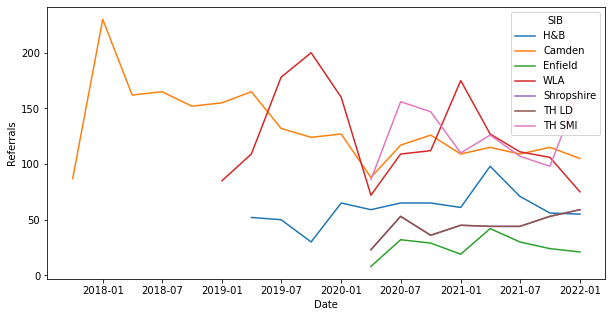

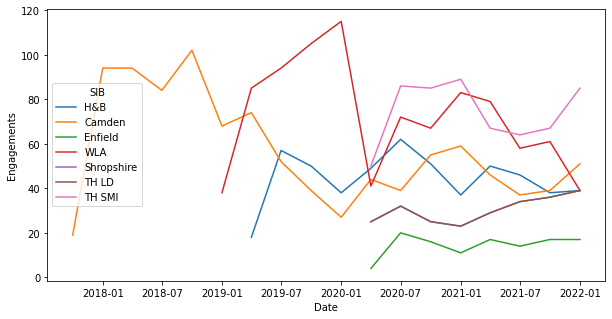

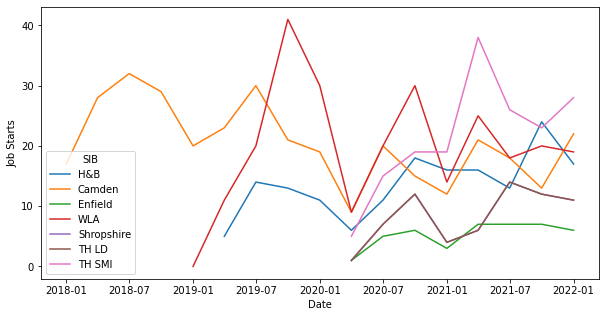

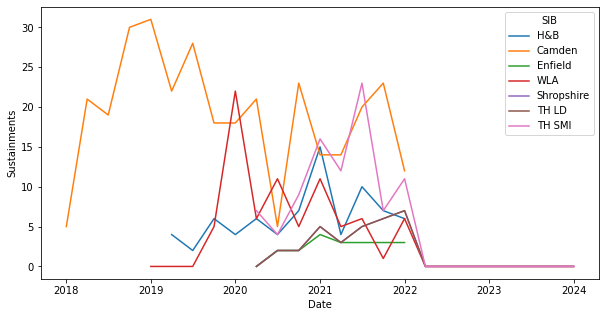

In [75]:
cols = list(cs_outcomes.columns)
for c in cols[2:6]:
    plt.figure(figsize=(10,5))
    sns.lineplot(x='Date', y=c, data=cs_outcomes, hue='SIB')

In [86]:
## creating FY totals

def create_analysis_columns(cs_outcomes):
    cols = list(cs_outcomes.columns)
    for c in cols[2:6]:
        cs_outcomes['FY ' + c] = cs_outcomes[c].groupby([cs_outcomes['FY'], cs_outcomes['SIB']]).transform('sum')
        cs_outcomes['FY Qly Avg ' + c] = cs_outcomes[c].groupby([cs_outcomes['FY'], cs_outcomes['SIB']]).transform('mean')    
        cs_outcomes['FY Low ' + c] = cs_outcomes[c].groupby([cs_outcomes['FY'], cs_outcomes['SIB']]).transform('min')
        cs_outcomes['FY High ' + c] = cs_outcomes[c].groupby([cs_outcomes['FY'], cs_outcomes['SIB']]).transform('max')


        cs_outcomes[c + ' Indexed to avg fyq performance'] = cs_outcomes[c]/cs_outcomes['FY Qly Avg ' + c]
        cs_outcomes[c + ' % of fy total'] = cs_outcomes[c]/cs_outcomes['FY ' + c]
        cs_outcomes[c + ' Indexed to fy min'] = cs_outcomes[c]/cs_outcomes['FY Low ' + c]
        cs_outcomes[c + ' Indexed to fy max'] = cs_outcomes[c]/cs_outcomes['FY High ' + c]

        cs_outcomes[c + ' Per ES'] = cs_outcomes[c]/cs_outcomes['Number of ES']

        cs_outcomes['FY Qly Avg ' + c + ' PES'] = cs_outcomes[c + ' Per ES'].groupby([cs_outcomes['FY'], cs_outcomes['SIB']]).transform('mean')    
        cs_outcomes['FY Low ' + c + ' PES'] = cs_outcomes[c + ' Per ES'].groupby([cs_outcomes['FY'], cs_outcomes['SIB']]).transform('min')
        cs_outcomes['FY High ' + c + ' PES'] = cs_outcomes[c + ' Per ES'].groupby([cs_outcomes['FY'], cs_outcomes['SIB']]).transform('max')

        cs_outcomes[c + ' Indexed to avg fyq PES'] = cs_outcomes[c + ' Per ES']/cs_outcomes['FY Qly Avg ' + c + ' PES']
        cs_outcomes[c + ' Indexed to fy min PES'] = cs_outcomes[c + ' Per ES']/cs_outcomes['FY Low ' + c + ' PES']
        cs_outcomes[c + ' Indexed to fy max PES'] = cs_outcomes[c + ' Per ES']/cs_outcomes['FY High ' + c + ' PES']
        
        if c == 'Referrals':
            pass
        else:
            denominator = cols.index(c) - 1
            numerator = cols.index(c)

            cs_outcomes[cols[denominator][0] + ' to ' + c[0] + ' Quarterly Conversion Rate'] = cs_outcomes[c]/cs_outcomes[cols[denominator]]

    return cs_outcomes


cs_outcomes = create_analysis_columns(cs_outcomes)

In [77]:
cs_outcomes

,Date,SIB,Referrals,Engagements,Job Starts,Sustainments,Number of ES,Month,Quarter,FY,FY Date,FY Referrals,FY Qly Avg Referrals,FY Low Referrals,FY High Referrals,Referrals Indexed to avg fyq performance,Referrals % of fy total,Referrals Indexed to fy min,Referrals Indexed to fy max,Referrals Per ES,FY Qly Avg Referrals PES,FY Low Referrals PES,FY High Referrals PES,Referrals Indexed to avg fyq PES,Referrals Indexed to fy min PES,Referrals Indexed to fy max PES,FY Engagements,FY Qly Avg Engagements,FY Low Engagements,FY High Engagements,Engagements Indexed to avg fyq performance,Engagements % of fy total,Engagements Indexed to fy min,Engagements Indexed to fy max,Engagements Per ES,FY Qly Avg Engagements PES,FY Low Engagements PES,FY High Engagements PES,Engagements Indexed to avg fyq PES,Engagements Indexed to fy min PES,Engagements Indexed to fy max PES,E to R Quarterly Conversion Rate,FY Job Starts,FY Qly Avg Job Starts,FY Low Job Starts,FY High Job Starts,Job Starts Indexed to avg fyq performance,Job Starts % of fy total,Job Starts Indexed to fy min,Job Starts Indexed to fy max,Job Starts Per ES,FY Qly Avg Job Starts PES,FY Low Job Starts PES,FY High Job Starts PES,Job Starts Indexed to avg fyq PES,Job Starts Indexed to fy min PES,Job Starts Indexed to fy max PES,J to E Quarterly Conversion Rate,FY Sustainments,FY Qly Avg Sustainments,FY Low Sustainments,FY High Sustainments,Sustainments Indexed to avg fyq performance,Sustainments % of fy total,Sustainments Indexed to fy min,Sustainments Indexed to fy max,Sustainments Per ES,FY Qly Avg Sustainments PES,FY Low Sustainments PES,FY High Sustainments PES,Sustainments Indexed to avg fyq PES,Sustainments Indexed to fy min PES,Sustainments Indexed to fy max PES,S to J Quarterly Conversion Rate
0,2016-01-01,H&B,NaN,NaN,NaN,NaN,NaN,1,Q4,2015,2015Q4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-04-01,H&B,NaN,NaN,NaN,NaN,NaN,4,Q1,2016,2016Q1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-01,H&B,NaN,NaN,NaN,NaN,NaN,7,Q2,2016,2016Q2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-10-01,H&B,NaN,NaN,NaN,NaN,NaN,10,Q3,2016,2016Q3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01,H&B,NaN,NaN,NaN,NaN,NaN,1,Q4,2016,2016Q4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-04-01,H&B,NaN,NaN,NaN,NaN,NaN,4,Q1,2017,2017Q1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-07-01,H&B,NaN,NaN,NaN,NaN,NaN,7,Q2,2017,2017Q2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017-10-01,H&B,NaN,NaN,NaN,NaN,NaN,10,Q3,2017,2017Q3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Barplot of average quarterly indexed performance (to avg fy performance) levels by quarter

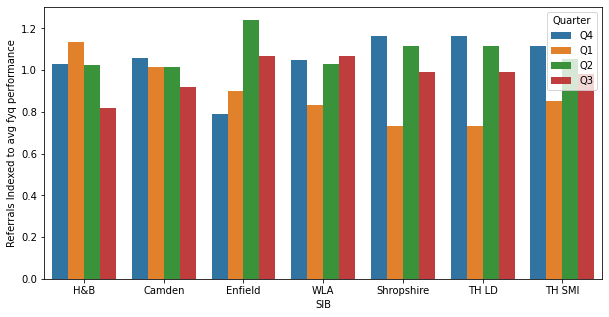

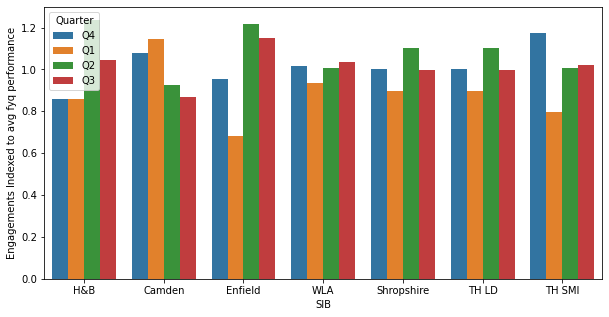

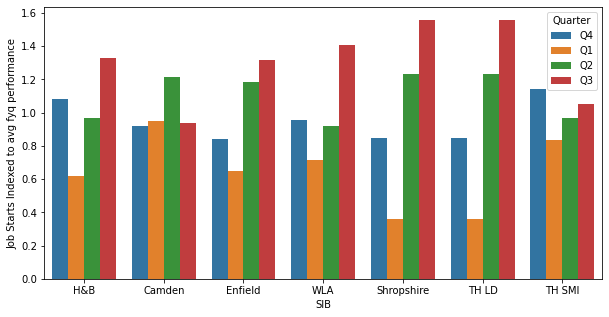

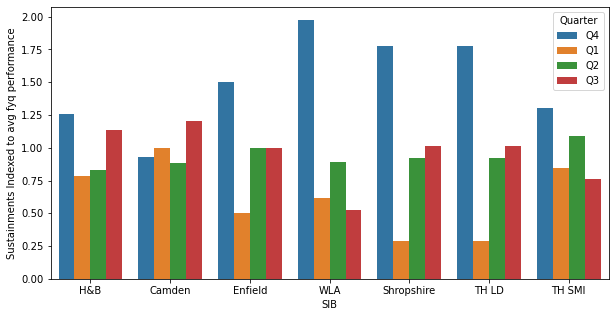

In [87]:
## use list comprehension to create y_value lists

cols = list(cs_outcomes.columns)
y_values = [x for x in cols if 'Indexed to avg fyq performance' in x]

for y in y_values:
    plt.figure(figsize=(10,5))
    sns.barplot(x='SIB', y=y, data=cs_outcomes, hue = 'Quarter', ci=None)

### % of FY Total achieved per FQ

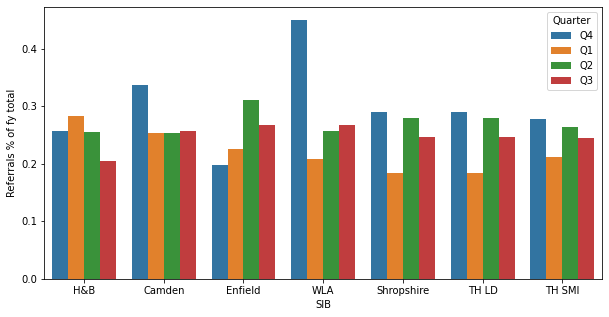

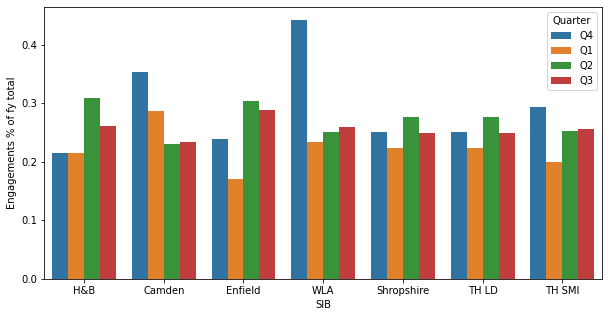

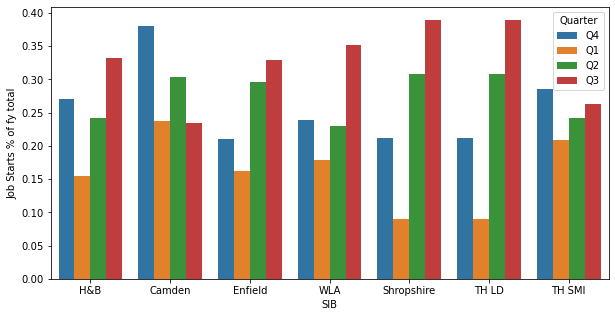

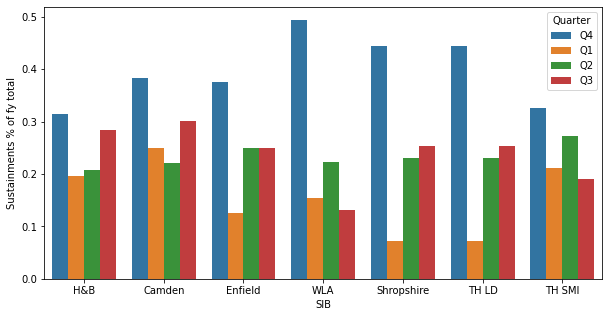

In [88]:
cols = list(cs_outcomes.columns)
y_values = [x for x in cols if '% of fy total' in x]

for y in y_values:
    plt.figure(figsize=(10,5))
    sns.barplot(x='SIB', y=y, data=cs_outcomes, hue = 'Quarter', ci=None)

### Quarterly Performance indexed to FY Quarterly Minimum

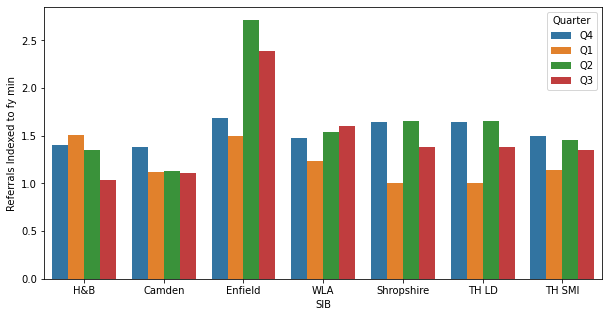

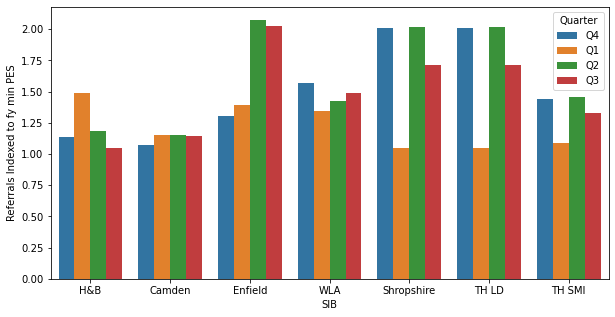

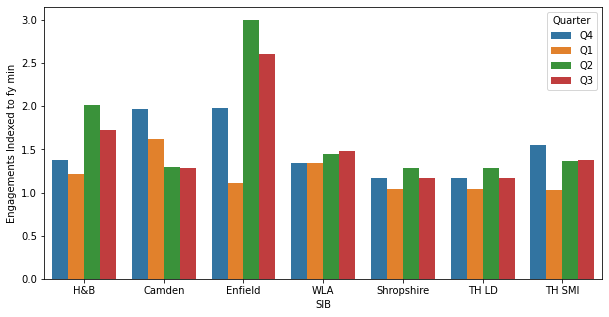

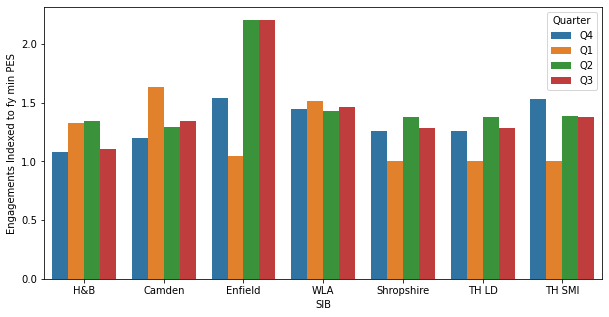

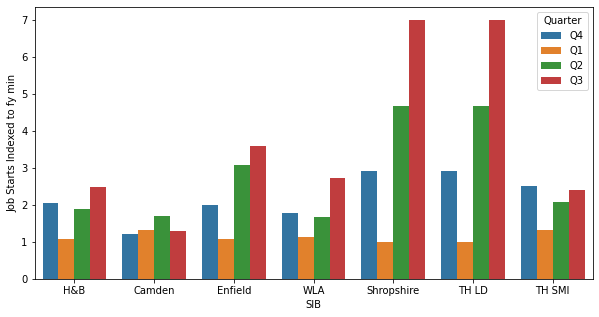

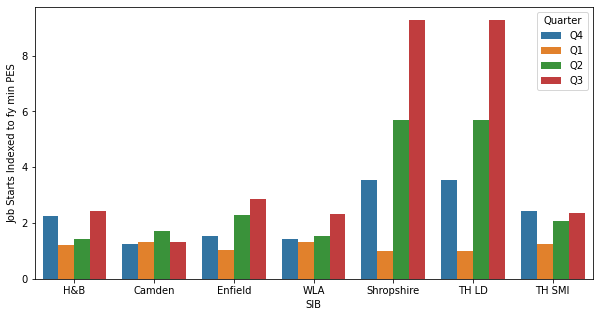

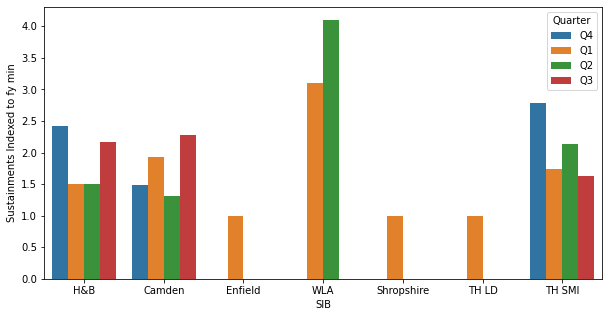

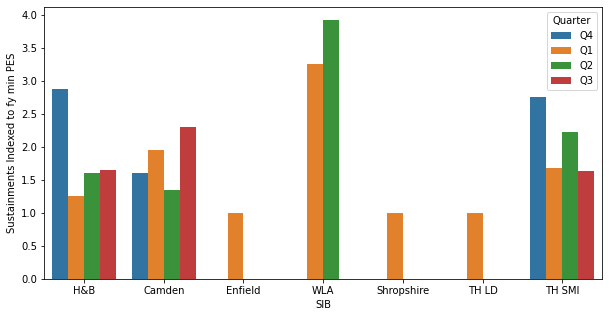

In [89]:
cols = list(cs_outcomes.columns)
y_values = [x for x in cols if 'Indexed to fy min' in x]

for y in y_values:
    plt.figure(figsize=(10,5))
    sns.barplot(x='SIB', y=y, data=cs_outcomes, hue = 'Quarter', ci=None)

### Indexed performance to FY Quarterly Maximum

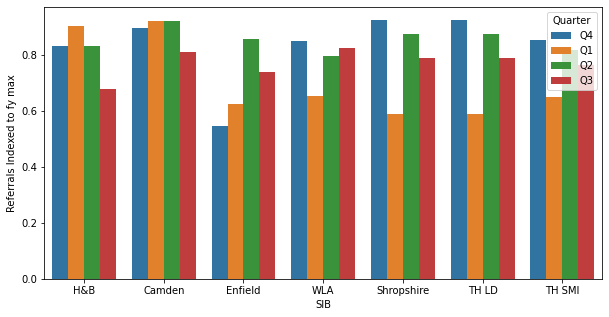

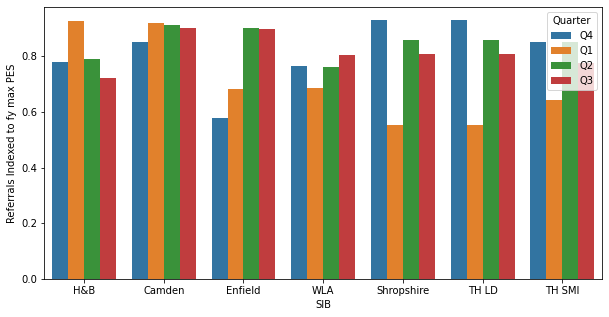

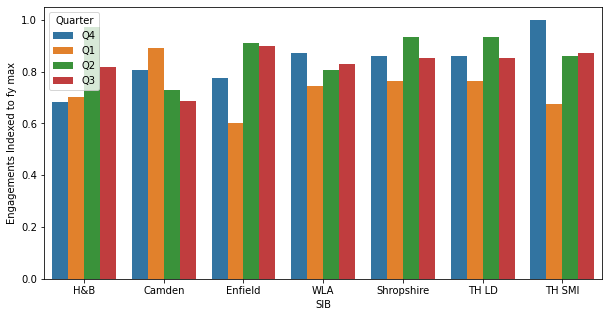

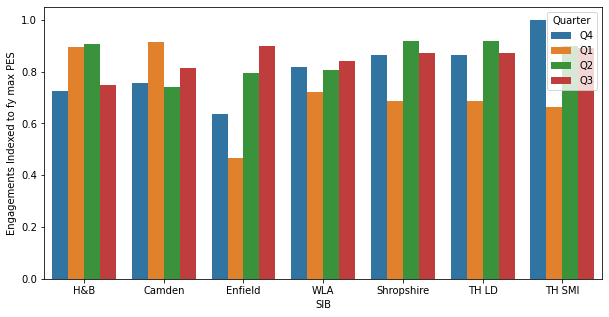

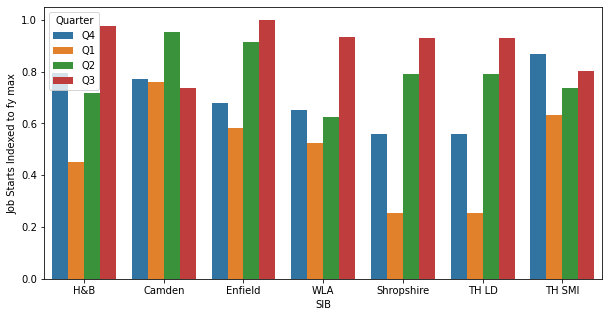

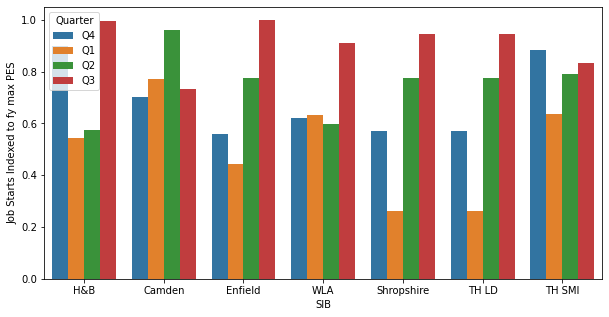

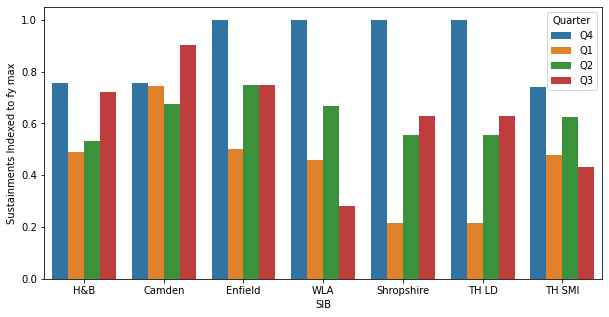

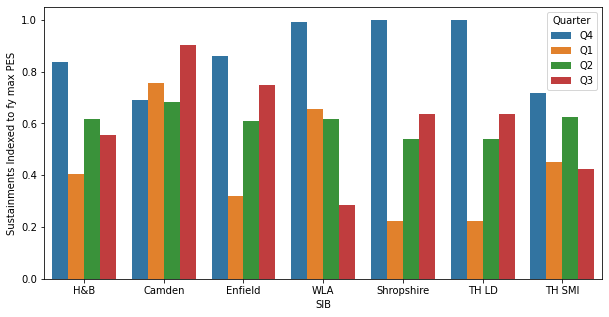

In [90]:
cols = list(cs_outcomes.columns)
y_values = [x for x in cols if 'Indexed to fy max' in x]

for y in y_values:
    plt.figure(figsize=(10,5))
    sns.barplot(x='SIB', y=y, data=cs_outcomes, hue = 'Quarter', ci=None)

## PER ES

In [91]:
cs_outcomes.head()

,Date,SIB,Referrals,Engagements,Job Starts,Sustainments,Number of ES,Month,Quarter,FY,FY Date,FY Referrals,FY Qly Avg Referrals,FY Low Referrals,FY High Referrals,Referrals Indexed to avg fyq performance,Referrals % of fy total,Referrals Indexed to fy min,Referrals Indexed to fy max,Referrals Per ES,FY Qly Avg Referrals PES,FY Low Referrals PES,FY High Referrals PES,Referrals Indexed to avg fyq PES,Referrals Indexed to fy min PES,Referrals Indexed to fy max PES,FY Engagements,FY Qly Avg Engagements,FY Low Engagements,FY High Engagements,Engagements Indexed to avg fyq performance,Engagements % of fy total,Engagements Indexed to fy min,Engagements Indexed to fy max,Engagements Per ES,FY Qly Avg Engagements PES,FY Low Engagements PES,FY High Engagements PES,Engagements Indexed to avg fyq PES,Engagements Indexed to fy min PES,Engagements Indexed to fy max PES,E to R Quarterly Conversion Rate,FY Job Starts,FY Qly Avg Job Starts,FY Low Job Starts,FY High Job Starts,Job Starts Indexed to avg fyq performance,Job Starts % of fy total,Job Starts Indexed to fy min,Job Starts Indexed to fy max,Job Starts Per ES,FY Qly Avg Job Starts PES,FY Low Job Starts PES,FY High Job Starts PES,Job Starts Indexed to avg fyq PES,Job Starts Indexed to fy min PES,Job Starts Indexed to fy max PES,J to E Quarterly Conversion Rate,FY Sustainments,FY Qly Avg Sustainments,FY Low Sustainments,FY High Sustainments,Sustainments Indexed to avg fyq performance,Sustainments % of fy total,Sustainments Indexed to fy min,Sustainments Indexed to fy max,Sustainments Per ES,FY Qly Avg Sustainments PES,FY Low Sustainments PES,FY High Sustainments PES,Sustainments Indexed to avg fyq PES,Sustainments Indexed to fy min PES,Sustainments Indexed to fy max PES,S to J Quarterly Conversion Rate,R to E Quarterly Conversion Rate,E to J Quarterly Conversion Rate,J to S Quarterly Conversion Rate
0,2016-01-01,H&B,NaN,NaN,NaN,NaN,NaN,1,Q4,2015,2015Q4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-04-01,H&B,NaN,NaN,NaN,NaN,NaN,4,Q1,2016,2016Q1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-01,H&B,NaN,NaN,NaN,NaN,NaN,7,Q2,2016,2016Q2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-10-01,H&B,NaN,NaN,NaN,NaN,NaN,10,Q3,2016,2016Q3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01,H&B,NaN,NaN,NaN,NaN,NaN,1,Q4,2016,2016Q4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


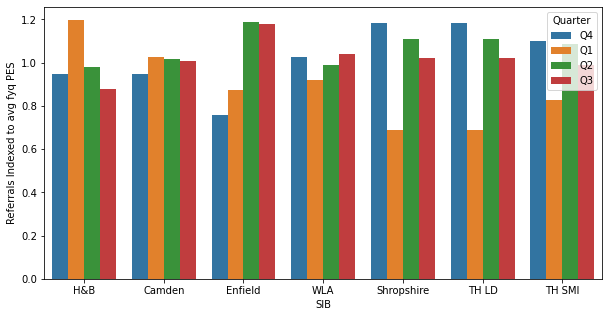

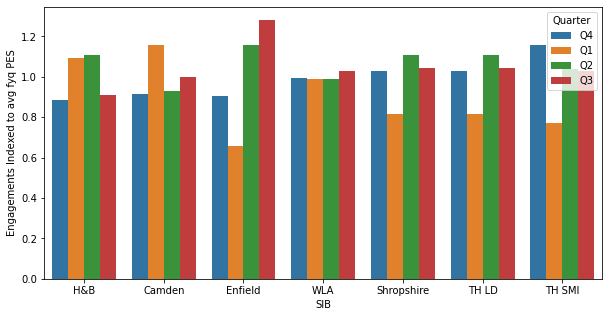

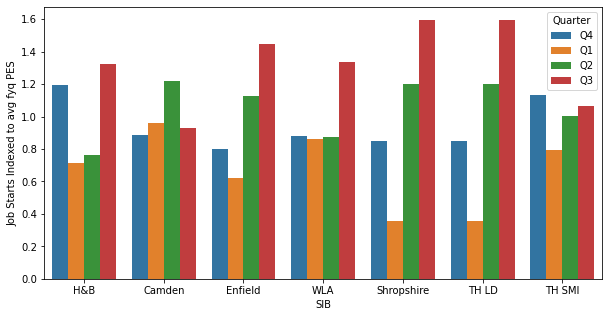

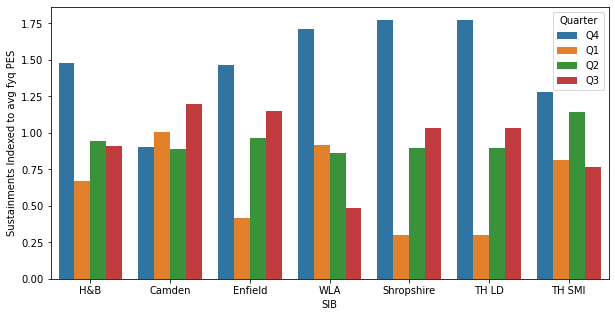

In [92]:
cols = list(cs_outcomes.columns)
y_values = [x for x in cols if 'Indexed to avg fyq PES' in x]

for y in y_values:
    plt.figure(figsize=(10,5))
    sns.barplot(x='SIB', y=y, data=cs_outcomes, hue = 'Quarter', ci=None)
    
plt.show()

### Quick look at conversion rates

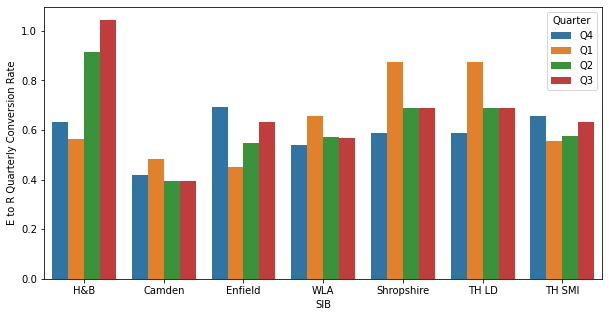

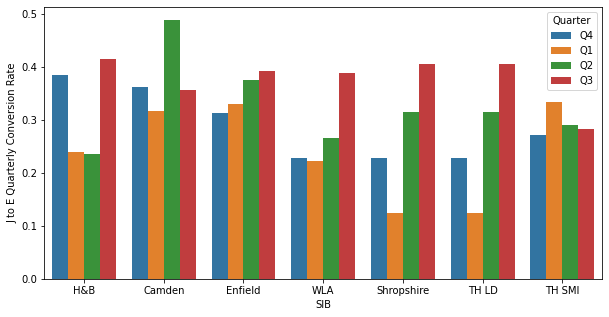

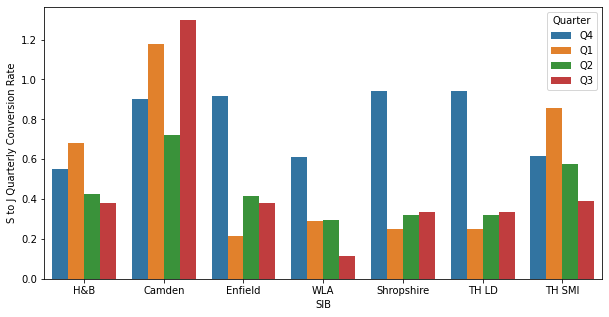

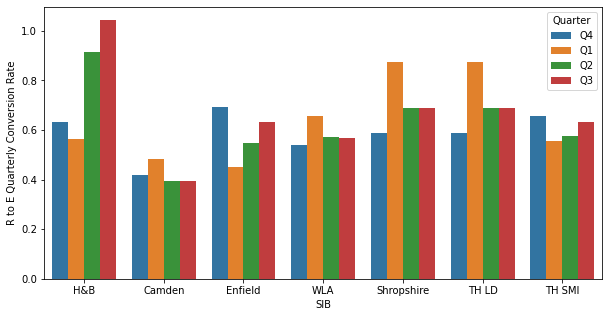

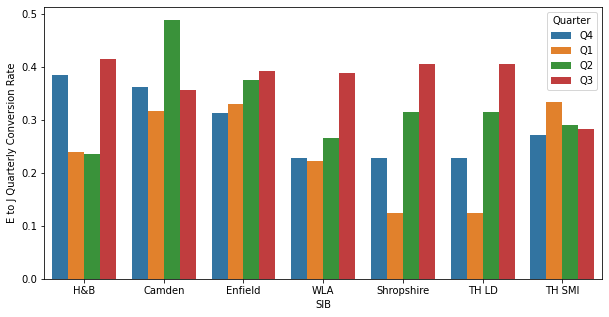

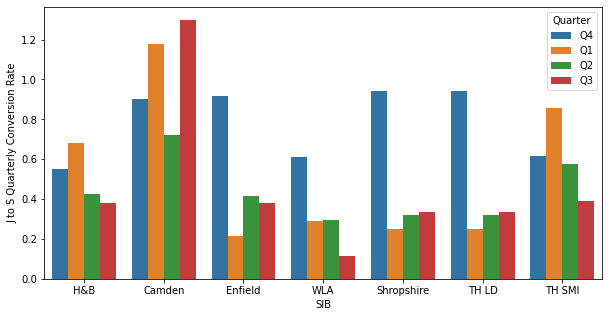

In [94]:
cols = list(cs_outcomes.columns)
y_values = [x for x in cols if 'Conversion Rate' in x]

for y in y_values:
    plt.figure(figsize=(10,5))
    sns.barplot(x='SIB', y=y, data=cs_outcomes, hue = 'Quarter', ci=None)
    
plt.show()

In [ ]:
## Looking at all 

In [98]:
def format_raw_data(cs_outcomes):
    cs_outcomes['Month'] = cs_outcomes['Date'].dt.month
    cs_outcomes['Quarter'] = np.where(cs_outcomes['Date'].dt.month == 4, 'Q1',
                                        np.where(cs_outcomes['Date'].dt.month == 7, 'Q2',
                                                np.where(cs_outcomes['Date'].dt.month == 10, 'Q3','Q4')
                                                )
                                        )

    cs_outcomes['FY'] = np.where(cs_outcomes['Quarter'].isin(['Q1', 'Q2', 'Q3']), cs_outcomes['Date'].dt.year,cs_outcomes['Date'].dt.year -1)
    cs_outcomes['FY'] = cs_outcomes['FY'].astype(str)
    cs_outcomes['FY Date'] = cs_outcomes['FY'] + cs_outcomes['Quarter']
    
    cs_outcomes = cs_outcomes.dropna(axis=0, subset = ['Referrals', 'Engagements', 'Job Starts', 'Sustainments'])
    
    
    return all_outcomes

all_outcomes = format_raw_data(outcomes)
all_outcomes = create_analysis_columns(all_outcomes)


,Date,SIB,Referrals,Engagements,Job Starts,Sustainments,Number of ES,Month,Quarter,FY,FY Date
0,2016-01-01,SCC,0.0,0.0,0.0,0.0,0.0,1,Q4,2015,2015Q4
1,2016-04-01,SCC,92.0,41.0,2.0,1.0,NaN,4,Q1,2016,2016Q1
2,2016-07-01,SCC,81.0,65.0,20.0,4.0,NaN,7,Q2,2016,2016Q2
3,2016-10-01,SCC,68.0,69.0,21.0,30.0,NaN,10,Q3,2016,2016Q3
4,2017-01-01,SCC,83.0,68.0,15.0,9.0,NaN,1,Q4,2016,2016Q4


In [99]:
all_outcomes = create_analysis_columns(all_outcomes)

,Date,SIB,Referrals,Engagements,Job Starts,Sustainments,Number of ES,Month,Quarter,FY,FY Date,FY Referrals,FY Qly Avg Referrals,FY Low Referrals,FY High Referrals,Referrals Indexed to avg fyq performance,Referrals % of fy total,Referrals Indexed to fy min,Referrals Indexed to fy max,Referrals Per ES,FY Qly Avg Referrals PES,FY Low Referrals PES,FY High Referrals PES,Referrals Indexed to avg fyq PES,Referrals Indexed to fy min PES,Referrals Indexed to fy max PES,FY Engagements,FY Qly Avg Engagements,FY Low Engagements,FY High Engagements,Engagements Indexed to avg fyq performance,Engagements % of fy total,Engagements Indexed to fy min,Engagements Indexed to fy max,Engagements Per ES,FY Qly Avg Engagements PES,FY Low Engagements PES,FY High Engagements PES,Engagements Indexed to avg fyq PES,Engagements Indexed to fy min PES,Engagements Indexed to fy max PES,R to E Quarterly Conversion Rate,FY Job Starts,FY Qly Avg Job Starts,FY Low Job Starts,FY High Job Starts,Job Starts Indexed to avg fyq performance,Job Starts % of fy total,Job Starts Indexed to fy min,Job Starts Indexed to fy max,Job Starts Per ES,FY Qly Avg Job Starts PES,FY Low Job Starts PES,FY High Job Starts PES,Job Starts Indexed to avg fyq PES,Job Starts Indexed to fy min PES,Job Starts Indexed to fy max PES,E to J Quarterly Conversion Rate,FY Sustainments,FY Qly Avg Sustainments,FY Low Sustainments,FY High Sustainments,Sustainments Indexed to avg fyq performance,Sustainments % of fy total,Sustainments Indexed to fy min,Sustainments Indexed to fy max,Sustainments Per ES,FY Qly Avg Sustainments PES,FY Low Sustainments PES,FY High Sustainments PES,Sustainments Indexed to avg fyq PES,Sustainments Indexed to fy min PES,Sustainments Indexed to fy max PES,J to S Quarterly Conversion Rate
0,2016-01-01,SCC,0.0,0.0,0.0,0.0,0.0,1,Q4,2015,2015Q4,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-04-01,SCC,92.0,41.0,2.0,1.0,NaN,4,Q1,2016,2016Q1,324.0,81.0,68.0,92.0,1.135802,0.283951,1.352941,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243.0,60.75,41.0,69.0,0.674897,0.168724,1.000000,0.594203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.445652,58.0,14.5,2.0,21.0,0.137931,0.034483,1.0,0.095238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048780,44.0,11.0,1.0,30.0,0.090909,0.022727,1.0,0.033333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
2,2016-07-01,SCC,81.0,65.0,20.0,4.0,NaN,7,Q2,2016,2016Q2,324.0,81.0,68.0,92.0,1.000000,0.250000,1.191176,0.880435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243.0,60.75,41.0,69.0,1.069959,0.267490,1.585366,0.942029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802469,58.0,14.5,2.0,21.0,1.379310,0.344828,10.0,0.952381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.307692,44.0,11.0,1.0,30.0,0.363636,0.090909,4.0,0.133333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000
3,2016-10-01,SCC,68.0,69.0,21.0,30.0,NaN,10,Q3,2016,2016Q3,324.0,81.0,68.0,92.0,0.839506,0.209877,1.000000,0.739130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243.0,60.75,41.0,69.0,1.135802,0.283951,1.682927,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.014706,58.0,14.5,2.0,21.0,1.448276,0.362069,10.5,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.304348,44.0,11.0,1.0,30.0,2.727273,0.681818,30.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571
4,2017-01-01,SCC,83.0,68.0,15.0,9.0,NaN,1,Q4,2016,2016Q4,324.0,81.0,68.0,92.0,1.024691,0.256173,1.220588,0.902174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243.0,60.75,41.0,69.0,1.119342,0.279835,1.658537,0.985507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819277,58.0,14.5,2.0,21.0,1.034483,0.258621,7.5,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.220588,44.0,11.0,1.0,30.0,0.818182,0.204545,9.0,0.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000


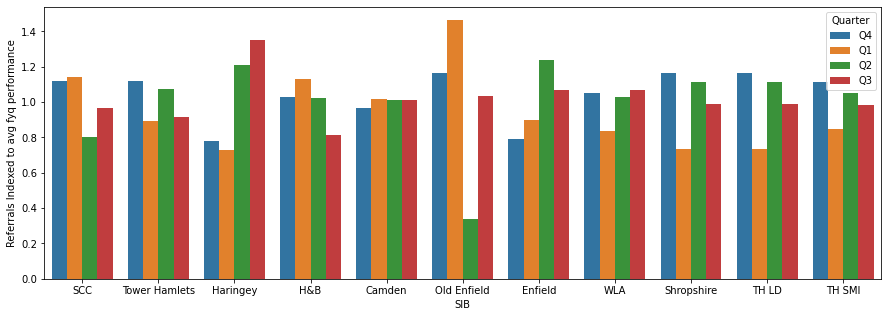

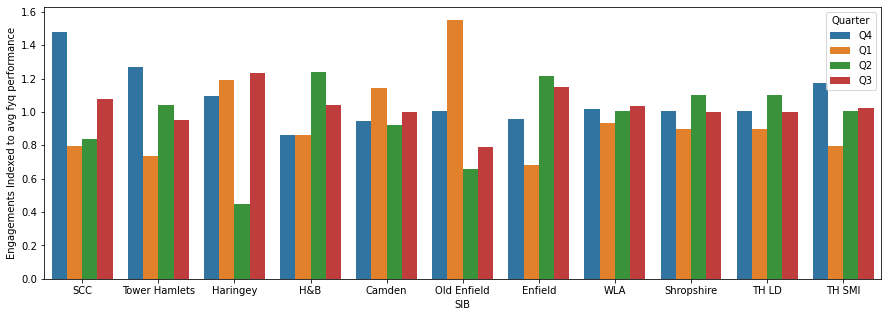

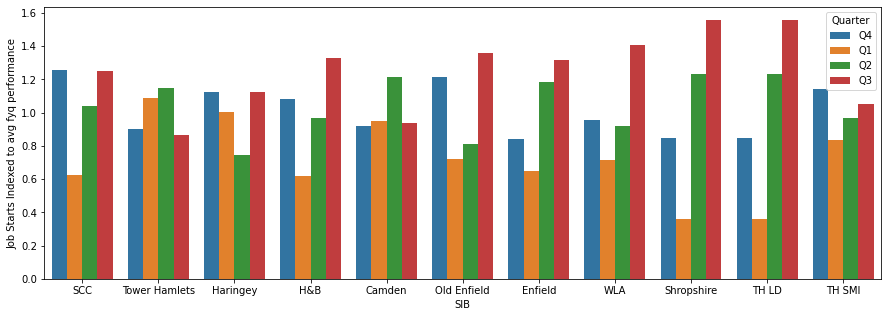

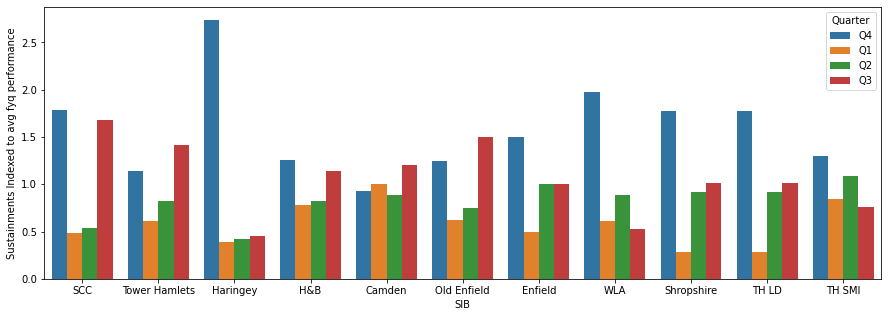

In [101]:
cols = list(all_outcomes.columns)
y_values = [x for x in cols if 'Indexed to avg fyq performance' in x]

for y in y_values:
    plt.figure(figsize=(15,5))
    sns.barplot(x='SIB', y=y, data=all_outcomes, hue = 'Quarter', ci=None)